In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [32]:
np.mean(data)

C:\Users\ssingh\Desktop\DAX-DS-Assignment-2022-Shivam_Singh\dsenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ssingh\Desktop\DAX-DS-Assignment-2022-Shivam_Singh\dsenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [47]:
pd.Series(np.median(data.drop(["gender","ever_married","work_type","Residence_type","smoking_status"],axis=1),axis=0),index=["id","age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"])

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                        NaN
stroke                   0.000
dtype: float64

In [18]:
np.std(data)

C:\Users\ssingh\Desktop\DAX-DS-Assignment-2022-Shivam_Singh\dsenv\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


id                   21159.650905
age                     22.610434
hypertension             0.296578
heart_disease            0.226041
avg_glucose_level       45.279129
bmi                      7.853267
stroke                   0.215299
dtype: float64

### Here we can see that in this corr matrix the features age and bmi are correlated more 0.33 value also the target_class heart_disease is less correlated from feature bmi means any change in heart_disease has not much effect on bmi feature and vice versa and obviously id correlated less with heart_disease

### NOTE: Here BMI and age are highly correlated hence we can do some mathematical computations for less feature for our model

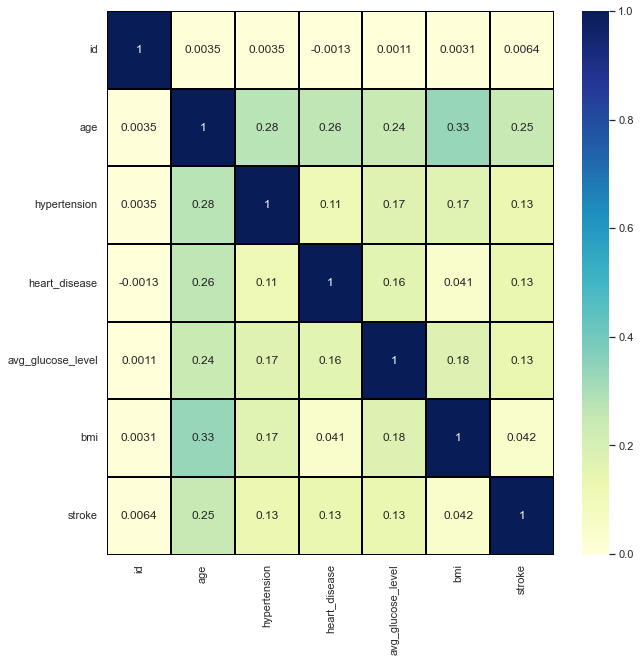

In [98]:
sns.heatmap(data.corr(),cmap="YlGnBu",linecolor="black",linewidths=2,annot=True)
sns.set(rc={'figure.figsize':(8,8)})

### Here in this countplot we can see that a individual who has never smoked has the highest count for not having heart_disease

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

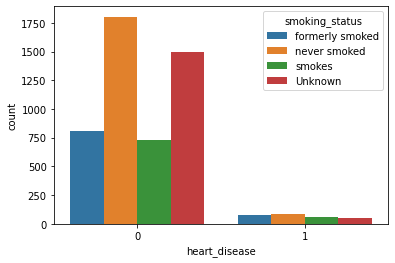

In [65]:
sns.countplot(x='heart_disease',hue="smoking_status",data=data)

In [48]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='heart_disease'>

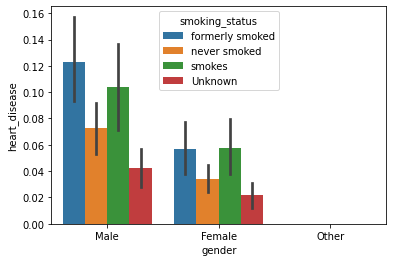

In [73]:
sns.barplot(x="gender",y="heart_disease",hue="smoking_status",data=data)

### In this violin Plot age is more varied across male with heart_disease around old age like around 75 years of age and the same can be said about the female and for both male and female that doesn't heart_disease is somewhat evenly varied

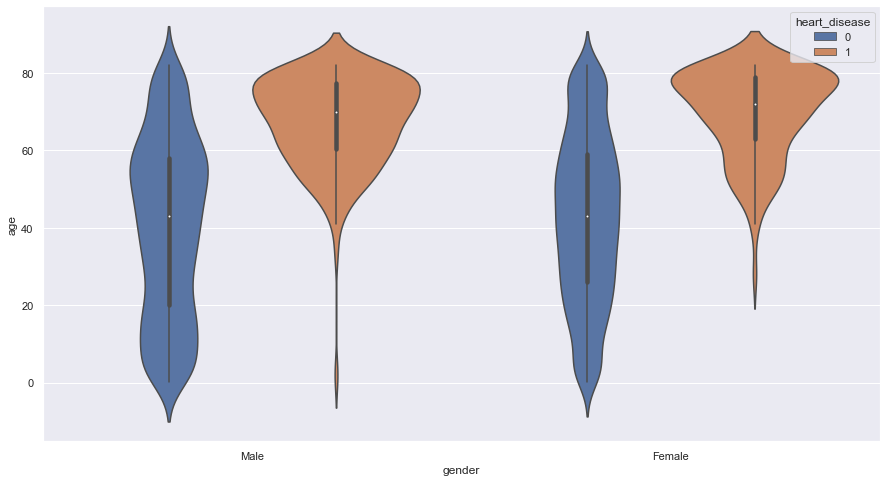

In [94]:
sns.violinplot(x="gender",y="age",hue="heart_disease",data=data[data["gender"]!="Other"])
sns.set(rc={'figure.figsize':(15,15)})

### In this swarmplot we can see that female with low avg_glucose_level are more in quantity than male with low avg_glucose_level

C:\Users\ssingh\Desktop\DAX-DS-Assignment-2022-Shivam_Singh\dsenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ssingh\Desktop\DAX-DS-Assignment-2022-Shivam_Singh\dsenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


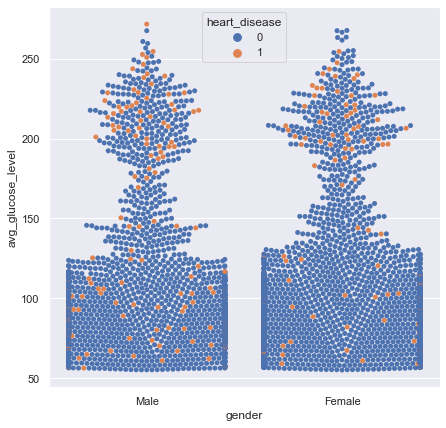

In [102]:
sns.swarmplot(x="gender",y="avg_glucose_level",hue="heart_disease",data=data[data["gender"]!="Other"])
sns.set(rc={'figure.figsize':(10,10)})

### In this kernel plot we can see that low glucose level can be found for age range of 0-85 and for high avg_glucose_level age range is 40-85

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

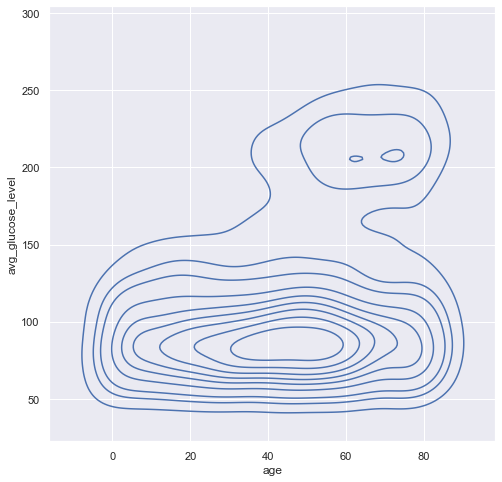

In [100]:
sns.kdeplot(x='age',y='avg_glucose_level',data=data)

In [95]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [55]:
data["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [57]:
data["avg_glucose_level"].max()

271.74

In [58]:
data["avg_glucose_level"].min()

55.12

In [59]:
data["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [112]:
cat_features = ["id","gender","ever_married","work_type","Residence_type","smoking_status"]

### Here we can visualize in this heatmap the values in which values bmi is Nan

<AxesSubplot:>

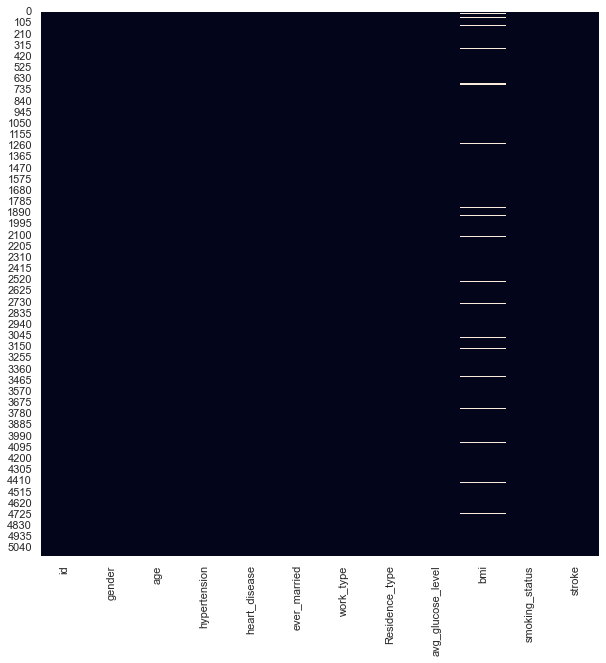

In [118]:
sns.heatmap(data.isnull(),cbar=False)

### Percentage of data in which bmi which is null

In [120]:
perc_bmi = sum(data["bmi"].isnull())/len(data)*100

3.9334637964774952

In [124]:
np.mean(data["bmi"])

28.893236911794666

### Imputating with median because data is skewed

In [130]:
data.fillna(data.median(),inplace=True)

C:\Users\ssingh\AppData\Local\Temp\ipykernel_3948\3840568419.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(),inplace=True)


In [131]:
data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.1     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.1     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]